In [69]:
# Three observable trends based on the data: (1) There is almost a bell-shaped curve in the
# maximum temperature vs. latitude plot. At 0 latitude (or the equator) we see the highest maximum
# temperatures. Once you go north or south (or in the plot, right or left) from there, you see drops. 
# (2) There is a cluster of data points at the 0 point of latitude in the humidity vs. latitude plot.
# They show a concentration of cities that have higher humidity. Humidity becomes much more diverse 
# once latitude increases or decreases, and one can see a lot of diversity here, especially with an
# increase. (3) The northern hemisphere maximum temperature vs latitude plot has a very strong 
# r-squared of nearly 0.9. We should not be surprised by this as there is in fact causation here.
# As we vertically move away from the hottest straight line on earth, we see the maximum temperatures
# decrease pretty much universally.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [159]:
# Perform a weather check on each city using a series of successive API calls.
# URL for GET requests to retrieve weather data...
url = "http://api.openweathermap.org/data/2.5/weather?q="
# Add the API key to the query.
api_key = "&appid=" + weather_api_key

# Set up lists to hold the reponse information.
response_cities = []
temperatures = []
cloudiness = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temperatures = []
wind_speeds = []
# Loop through the list of cities and perform a request for data on each of them.
i = 1
j = 1
print("Beginning Data Retrieval""\n""-----------------------------")
for city in cities:
    weather_check_response = requests.get(url + city + api_key).json()
    try:
        response_cities.append(weather_check_response["name"])
        temperatures.append(weather_check_response["main"]["temp"])
        cloudiness.append(weather_check_response["clouds"]["all"])
        countries.append(weather_check_response["sys"]["country"])
        dates.append(weather_check_response["dt"])
        humidities.append(weather_check_response["main"]["humidity"])
        latitudes.append(weather_check_response["coord"]["lat"])
        longitudes.append(weather_check_response["coord"]["lon"])
        max_temperatures.append(weather_check_response["main"]["temp_max"])
        wind_speeds.append(weather_check_response["wind"]["speed"])
        # Include a print log of each city as it's being processed (with the city number and city name).
        print(f"Processing Record {i} of Set {j} | {city}")
        # Implement the method below so that we do not go over the API calls limit.
        time.sleep(1)
        if i < 49:
            i += 1
        else:
            i = 0
            j += 1
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------""\n""Data Retrieval Complete""\n""-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | aquidauana
Processing Record 10 of Set 1 | qasigiannguit
City not found. Skipping...
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | gizo
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | lashio
Processing Record 17 of Set 1 | mataura
City not found. Skipping...
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | kotka
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | nushki
Processing Record 42 of Set 4 | trairi
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | ashta
Processing Record 46 of Set 4 | zaysan
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | diban
Processing Record 49 of Set 4 | mareeba
Processing Record 0 of Set 5 | shimanovsk
Processing Record 1 of Set 5 | gat
City not found. Skipping...
Processing Record 2 of Set 5 | itapicuru
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | sambava
Processing Record 7 of Set 5 | tomatlan
Processing Record 8 of Set 5 | weihai
Processing Record 9 of Set 5 | ornskoldsvik
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | karasjok
Processing Record 12 of Set 5 | hasaki


Processing Record 26 of Set 8 | turayf
Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | maragogi
Processing Record 29 of Set 8 | beinamar
Processing Record 30 of Set 8 | khislavichi
Processing Record 31 of Set 8 | west wendover
Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | alejandria
Processing Record 34 of Set 8 | petatlan
Processing Record 35 of Set 8 | sol-iletsk
Processing Record 36 of Set 8 | verkhnyaya inta
Processing Record 37 of Set 8 | primo tapia
City not found. Skipping...
Processing Record 38 of Set 8 | batemans bay
Processing Record 39 of Set 8 | palmas de monte alto
Processing Record 40 of Set 8 | toora-khem
Processing Record 41 of Set 8 | sinjai
Processing Record 42 of Set 8 | indiana
Processing Record 43 of Set 8 | narsaq
Processing Record 44 of Set 8 | hualmay
Processing Record 45 of Set 8 | verkhnyaya salda
Processing Record 46 of Set 8 | oud-beijerland
Processing Record 47 of Set 8 | mount pleasant
Processing Record 48 of

Processing Record 8 of Set 12 | monterey
Processing Record 9 of Set 12 | thinadhoo
Processing Record 10 of Set 12 | port hedland
-----------------------------
Data Retrieval Complete
-----------------------------


In [152]:
len(countries)

560

In [176]:
weather_check_df = pd.DataFrame({"City": response_cities, 
                                 "Cloudiness": cloudiness, 
                                 "Country": countries, 
                                 "Date": dates, 
                                 "Humidity": humidities, 
                                 "Lat": latitudes, 
                                 "Lng": longitudes, 
                                 "Max Temp": max_temperatures, 
                                 "Wind Speed": wind_speeds})
weather_check_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [180]:
weather_check_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sola,29,VU,1584232509,77,-13.88,167.55,302.85,11.23
1,Castro,0,BR,1584232350,67,-24.79,-50.01,291.15,0.92
2,Klaksvík,100,FO,1584232524,69,62.23,-6.59,275.15,8.20
3,Saint-François,0,FR,1584232649,86,46.42,3.91,279.26,1.00
4,Yellowknife,90,CA,1584232650,60,62.46,-114.35,261.15,3.60


In [181]:
weather_check_df_to_csv = weather_check_df.to_csv("weather_check.csv", index = False, header = True)

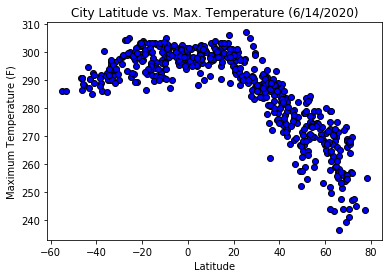

In [163]:
latitude_temperature_plot = plt.scatter(weather_check_df["Lat"], 
                                        weather_check_df["Max Temp"], 
                                        marker = "o", 
                                        facecolors = "blue", 
                                        edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max. Temperature (6/14/2020)")
plt.savefig("latitude_temperature_plot.png")
# Explanation/Analysis: This looks a little bit like an upside-down U-shaped distribution; it is skewed to the left.

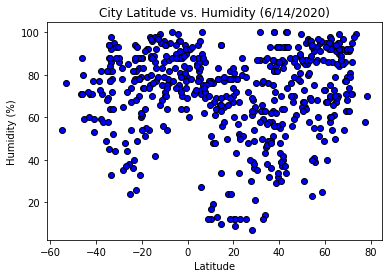

In [164]:
latitude_humidity_plot = plt.scatter(weather_check_df["Lat"], 
                                     weather_check_df["Humidity"], 
                                     marker = "o", 
                                     facecolors = "blue", 
                                     edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (6/14/2020)")
plt.savefig("latitude_humidity_plot.png")
# Explanation/Analysis: The below is pretty "scattered", so to speak. There are no real outliers that we can "see".

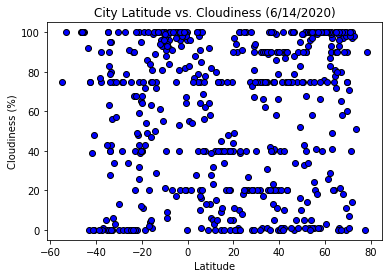

In [165]:
latitude_cloudiness_plot = plt.scatter(weather_check_df["Lat"], 
                                       weather_check_df["Cloudiness"], 
                                       marker = "o", 
                                       facecolors = "blue", 
                                       edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (6/14/2020)")
plt.savefig("latitude_cloudiness_plot.png")
# Explanation/Analysis: It has uniformity at some points, like 0, 20, 40, 80, and 100.

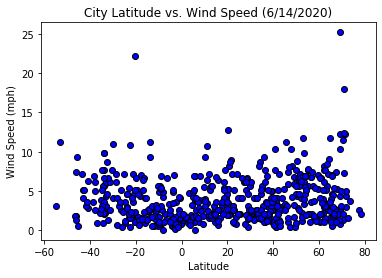

In [166]:
latitude_wind_speed_plot = plt.scatter(weather_check_df["Lat"], 
                                       weather_check_df["Wind Speed"], 
                                       marker = "o", 
                                       facecolors = "blue", 
                                       edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (6/14/2020)")
plt.savefig("latitude_wind_speed_plot.png")
# Explanation/Analysis: This is also pretty uniform, outside of a handful of outliers.
# (continued) Correlation would be hovering around zero.

The r-squared is -0.8930815672274195.


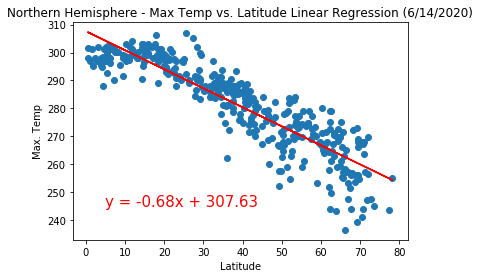

In [182]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_cities_df = weather_check_df.loc[weather_check_df["Lat"] > 0, :]
southern_hemisphere_cities_df = weather_check_df.loc[weather_check_df["Lat"] < 0, :]
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_cities_df["Lat"]
y_values = northern_hemisphere_cities_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5, 245), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("northern_hemisphere_temperature_latitude_regression.png")
# Explanation/Analysis: There is a negative correlation between these two variables, 
# (continued) but we cannot call it strong (0.8).
# We know intuitively that as one goes north of the equator, they should see a drop in maximum temperature.

The r-squared is 0.5619895951880305.


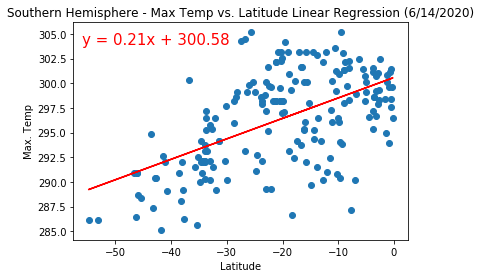

In [183]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southern_hemisphere_cities_df["Lat"]
y_values = southern_hemisphere_cities_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-56, 304), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("southern_hemisphere_temperature_latitude_regression.png")
# Explanation/Analysis: Interestingly, this is showing the reverse effect (going south of the equator),
# (continued) but correlation is much less than 0.68.
# This is because the data points are more spread out (there are more points farther from the line of best fit).

The r-squared is 0.23611420746835907.


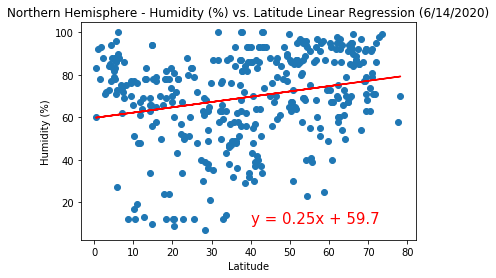

In [191]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_cities_df["Lat"]
y_values = northern_hemisphere_cities_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 10), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("northern_hemisphere_humidity_latitude_regression.png")
# Explanation/Analysis: The line of regression is positive but quite flat. I suppose that from this random sample,
# (continued) one cannot definitively conclude that the humidity percentage increases as we go north of the equator.

The r-squared is 0.28852651993390954.


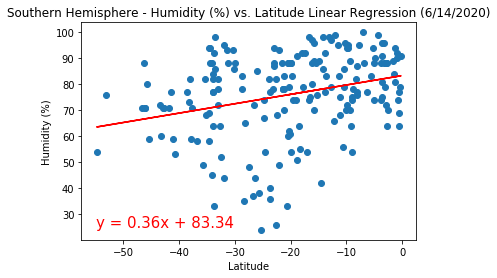

In [192]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southern_hemisphere_cities_df["Lat"]
y_values = southern_hemisphere_cities_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 25), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("southern_hemisphere_humidity_latitude_regression.png")
# Explanation/Analysis: Here, we have a slightly stronger positive correlation.
# Our intuition tells us that this makes some sense.
# As we go towards the equator, it is hotter, and it is corelatively more humid.

The r-squared is 0.22421329166636353.


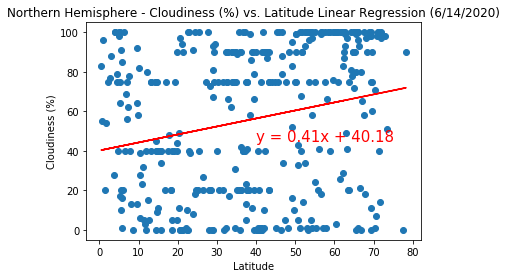

In [195]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_cities_df["Lat"]
y_values = northern_hemisphere_cities_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 45), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("northern_hemisphere_cloudiness_latitude_regression.png")
# Explanation/Analysis: The r-squared is once again somewhat weak.
# There are clustered points around the 0%, 20%, 40%, 80$,
# (continued) and 100% of cloudiness. As we get farther from the latitude,
# (continued) there is not much that we can gather from the data.

The r-squared is 0.23548037369448688.


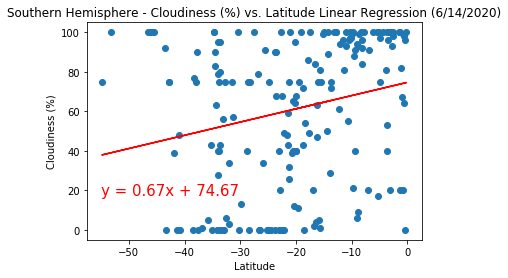

In [199]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southern_hemisphere_cities_df["Lat"]
y_values = southern_hemisphere_cities_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 17.5), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("southern_hemisphere_cloudiness_latitude_regression.png")
# Explanation/Analysis: We see clusters of data again at 0% and 100% cloudiness.
# The data is not showing a discernable pattern, although the line of best fit has a positive slope.

The r-squared is 0.2041094675947777.


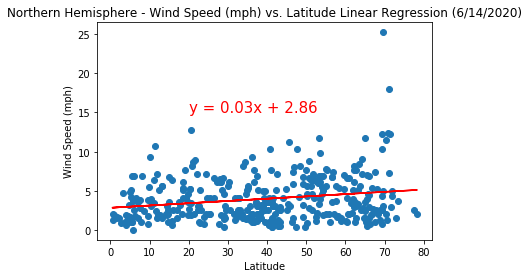

In [209]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_cities_df["Lat"]
y_values = northern_hemisphere_cities_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 15), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("northern_hemisphere_wind_speed_latitude_regression.png")
# Explanation/Analysis: The slope is almost 0, at 0.03. The r-squared is relatively weak.
# There are some outliers near the upper-right portion of the plot.
# However, much of the data is hovering around 0 to 10 mph.

The r-squared is -0.31528221715907084.


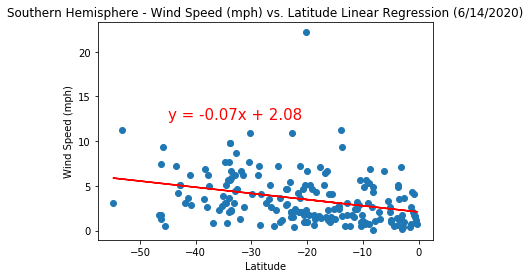

In [214]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southern_hemisphere_cities_df["Lat"]
y_values = southern_hemisphere_cities_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-45, 12.5), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (6/14/2020)")
# Print out the r-squared value along with the plot.
print(f"The r-squared is {rvalue}.")
plt.savefig("southern_hemisphere_wind_speed_latitude_regression.png")
# Explanation/Analysis: This is showing a slightly stronger correlation.
# Outside of one very visible outlier at the top of the plot,
# (continued) it is visible to us that the data points have some pattern of
# (continued) showing lesser wind speeds closer to the equator.